In [1]:
import pandas as pd

import sqlite3
import sqlalchemy

import nltk
#nltk.download("stopwords")
#nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import time
from IPython.display import clear_output

## Read data from Database

In [2]:
connection = sqlite3.connect('Crypto_Tweets.db')
engine = sqlalchemy.create_engine('sqlite:///Crypto_Tweets.db')

## Getting sentiment

In [3]:
stopwords_ = set(stopwords.words("english"))
#Add few words in to stopwords set
stopwords_.update(['bitcoin', 'crypto', 'btc', 'ethereum', 'eth', 'rt', 'http', 'co'])

tokenizer = RegexpTokenizer(r"\w+")
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    #Function to lematize, stem and remove stopwords
    words = [lemmatizer.lemmatize(w) for w in text if w not in stopwords_]
    stem_text = " ".join([stemmer.stem(i) for i in words])
    return stem_text

def getSentiment(tweet):
    #Use TextBlob to calculate polarity of tweets
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity  # work out sentiment

## Visualization

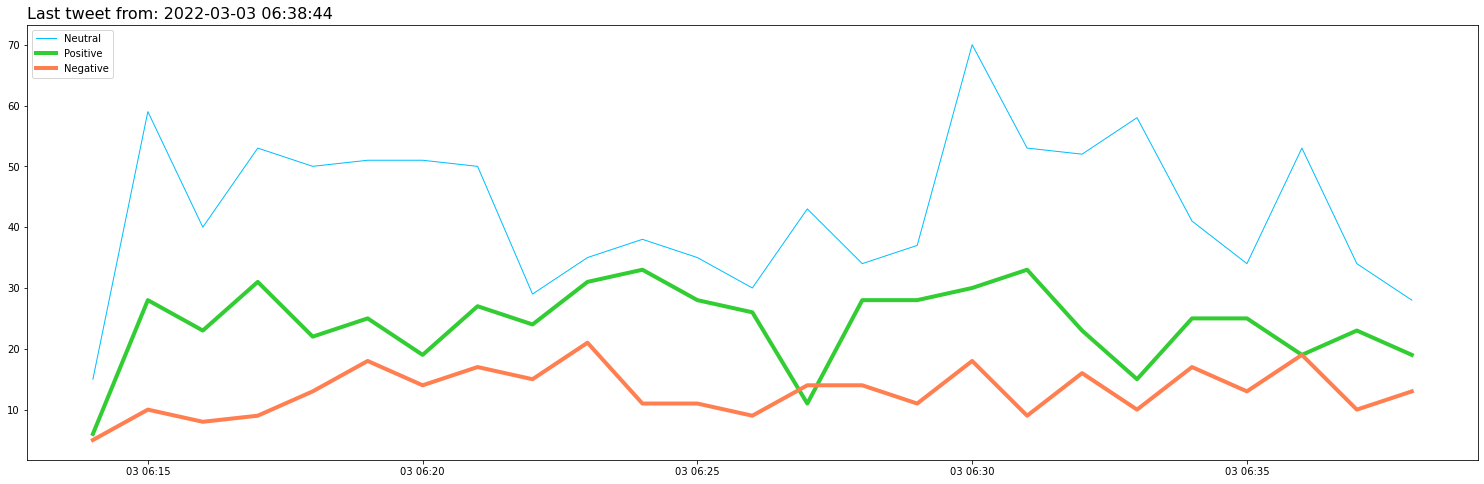

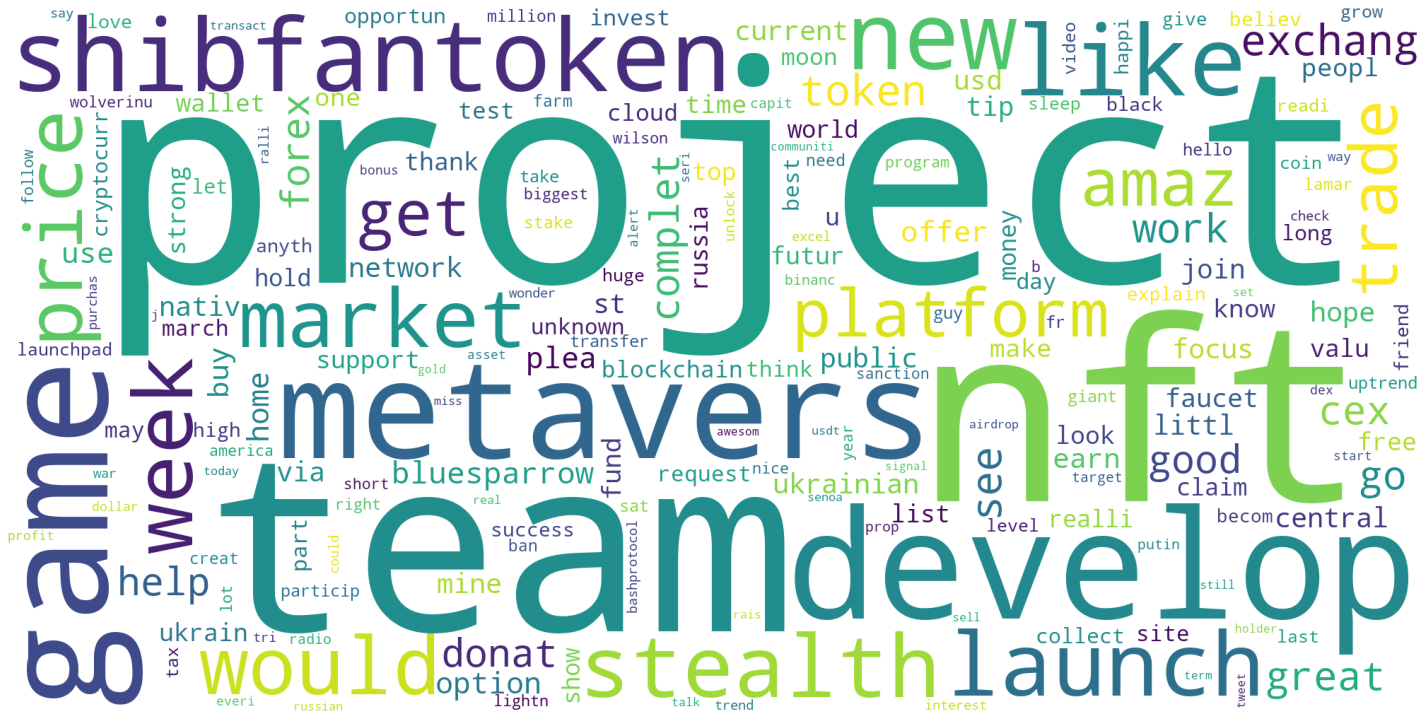

KeyboardInterrupt: 

In [4]:
while True:
    df = pd.read_sql('SELECT * FROM Tweets', engine)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace = True)
    #Get only last 2000 tweets
    df = df.iloc[-2000:]
    #apply prepared functions for preprocess and sentiment
    df["processed_text"] = df["processed_text"].apply(lambda x: preprocess(tokenizer.tokenize(x.lower())))
    df["polarity"] = df["processed_text"].apply(lambda x: getSentiment(x))
    df["sentiment"] = df["polarity"].apply(lambda s: "Positive" if s > 0 else ("Neutral" if s == 0 else "Negative"))
    
    #Line chart
    plt.figure(figsize = (26, 8))
    plt.plot(df[df['sentiment'] == 'Neutral'].resample('1Min').count()['sentiment'], label = 'Neutral', color = 'deepskyblue', lw = 1)
    plt.plot(df[df['sentiment'] == 'Positive'].resample('1Min').count()['sentiment'], label = 'Positive', color = 'Limegreen', lw = 4)
    plt.plot(df[df['sentiment'] == 'Negative'].resample('1Min').count()['sentiment'], label = 'Negative', color = 'coral', lw = 4)
    plt.legend(loc = 'upper left')
    plt.title('Last tweet from: ' + str(df.index[-1]), size = 16, loc = 'left')
    
    #Word clould
    wordcloud = WordCloud(
    collocations=False, 
    width = 2000, 
    height = 1000,
    stopwords=stopwords_, 
    background_color = 'white').generate(' '.join(df['processed_text'].tolist()).lower())

    plt.figure(figsize=(26,13))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    time.sleep(30)
    clear_output(wait = True)